<a href="https://colab.research.google.com/github/bharath1659/Thota_IT533/blob/main/MosquitoTestResults.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import tensorflow as tf # This tells Colab that we are using TensorFlow
from tensorflow import keras # This is the main TensorFlow library
from tensorflow.keras import layers # We are building a Neural Network with several hidden layers
from tensorflow.keras.layers.experimental import preprocessing
from keras.models import Sequential
from keras.layers import Dense

print("Current TensorFlow version is", tf.__version__)

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns # for visualization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import plot_confusion_matrix 
from sklearn.metrics import classification_report 
from sklearn.metrics import multilabel_confusion_matrix
import warnings
warnings.filterwarnings("ignore")
np.random.seed(42)

#Reading in the data as adult dataframe
mosquito = pd.read_csv("https://raw.githubusercontent.com/shstreuber/Data-Mining/master/data/West_Nile_Virus__WNV__Mosquito_Test_Results.csv")
mosquito.head()

Current TensorFlow version is 2.8.2


,SEASON YEAR,WEEK,TEST ID,BLOCK,TRAP,TRAP_TYPE,TEST DATE,NUMBER OF MOSQUITOES,RESULT,SPECIES,LATITUDE,LONGITUDE,LOCATION
0,2014,39,40542,100XX W OHARE AIRPORT,T902,GRAVID,09/25/2014 12:09:00 AM,8,negative,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN
1,2016,37,44219,100XX W OHARE AIRPORT,T902,GRAVID,09/15/2016 12:09:00 AM,39,negative,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN
2,2017,33,45351,100XX W OHARE AIRPORT,T905,GRAVID,08/17/2017 12:08:00 AM,50,positive,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN
3,2017,33,45345,100XX W OHARE AIRPORT,T900,GRAVID,08/17/2017 12:08:00 AM,17,positive,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN
4,2016,37,44169,4XX W 127TH,T135,GRAVID,09/15/2016 12:09:00 AM,12,negative,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN


In [62]:
mosquito['RESULT'].replace(['positive', 'negative'],
                        [0, 1], inplace=True)

In [63]:
mosquito.head()

,SEASON YEAR,WEEK,TEST ID,BLOCK,TRAP,TRAP_TYPE,TEST DATE,NUMBER OF MOSQUITOES,RESULT,SPECIES,LATITUDE,LONGITUDE,LOCATION
0,2014,39,40542,100XX W OHARE AIRPORT,T902,GRAVID,09/25/2014 12:09:00 AM,8,1,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN
1,2016,37,44219,100XX W OHARE AIRPORT,T902,GRAVID,09/15/2016 12:09:00 AM,39,1,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN
2,2017,33,45351,100XX W OHARE AIRPORT,T905,GRAVID,08/17/2017 12:08:00 AM,50,0,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN
3,2017,33,45345,100XX W OHARE AIRPORT,T900,GRAVID,08/17/2017 12:08:00 AM,17,0,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN
4,2016,37,44169,4XX W 127TH,T135,GRAVID,09/15/2016 12:09:00 AM,12,1,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN


In [64]:
mosquito.describe()

,SEASON YEAR,WEEK,TEST ID,NUMBER OF MOSQUITOES,RESULT,LATITUDE,LONGITUDE
count,29489.000000,29489.000000,29489.000000,29489.000000,29489.000000,25073.000000,25073.000000
mean,2012.502018,31.073587,35155.917156,12.353827,0.915630,41.836094,-87.687875
std,3.802700,4.533390,8630.314684,15.261187,0.277947,0.112719,0.076802
min,2007.000000,20.000000,20000.000000,1.000000,0.000000,41.644720,-87.854473
25%,2009.000000,28.000000,27718.000000,2.000000,1.000000,41.731447,-87.745420
50%,2012.000000,31.000000,35150.000000,5.000000,1.000000,41.825398,-87.689417
75%,2016.000000,35.000000,42641.000000,16.000000,1.000000,41.941991,-87.632955
max,2019.000000,40.000000,50029.000000,77.000000,1.000000,42.017801,-87.531060


In [65]:
mosquito['RESULT'] = mosquito['RESULT'].astype('category')
mosquito['RESULT'] = mosquito['RESULT'].cat.codes

In [66]:
x = mosquito['RESULT'].values
scaler = StandardScaler()

mosquito['RESULT'] = scaler.fit_transform(np.reshape(x,(-1,1)))
mosquito['RESULT']

0        0.303554
1        0.303554
2       -3.294312
3       -3.294312
4        0.303554
           ...   
29484    0.303554
29485    0.303554
29486    0.303554
29487    0.303554
29488    0.303554
Name: RESULT, Length: 29489, dtype: float64

In [67]:
bins = np.linspace(mosquito['NUMBER OF MOSQUITOES'].min(),mosquito['NUMBER OF MOSQUITOES'].max(),6)

labels = ['xs','s','m','l','xl']

mosquito['NUMBER OF MOSQUITOES'] = pd.cut(mosquito['NUMBER OF MOSQUITOES'] , bins=bins, labels=labels, include_lowest=True)

In [68]:
mosquito['NUMBER OF MOSQUITOES'].value_counts()

xs    22212
s      3036
l      2573
m      1667
xl        1
Name: NUMBER OF MOSQUITOES, dtype: int64

In [69]:
mosquito.LONGITUDE.replace(np.nan,'null',inplace=True)

In [70]:
mosquito['LONGITUDE'].isnull().sum()

0

In [71]:
mosquito['WEEK'].describe()

count    29489.000000
mean        31.073587
std          4.533390
min         20.000000
25%         28.000000
50%         31.000000
75%         35.000000
max         40.000000
Name: WEEK, dtype: float64

In [72]:
train_mosquitoset = mosquito.sample(frac=0.8, random_state=0)
test_mosquitoset= mosquito.drop(train_mosquito.index)

In [73]:
train, test = train_test_split(mosquito, test_size = 0.2)

In [75]:
mosquito[['NUMBER OF MOSQUITOES','LOCATION','WEEK']].corr()

,WEEK
WEEK,1.0


In [76]:
mosquito = mosquito[['WEEK', 'TRAP_TYPE','NUMBER OF MOSQUITOES', 'RESULT','SPECIES','LOCATION']]

mosquito['TRAP_TYPE'] = mosquito['TRAP_TYPE'].astype('category')
mosquito['TRAP_TYPE'] = mosquito['TRAP_TYPE'].cat.codes

mosquito['SPECIES'] = mosquito['SPECIES'].astype('category')
mosquito['SPECIES'] = mosquito['SPECIES'].cat.codes

mosquito['LOCATION'] = mosquito['LOCATION'].astype('category')
mosquito['LOCATION'] = mosquito['LOCATION'].cat.codes

In [77]:
train_mosquito = mosquito.sample(frac=0.8, random_state=0)
test_mosquito = mosquito.drop(train_mosquito.index)

# Splitting Features from Labels
train_features = train_mosquito.copy()
test_features = test_mosquito.copy()

train_labels = train_features.pop('NUMBER OF MOSQUITOES')
test_labels = test_features.pop('NUMBER OF MOSQUITOES')


In [78]:
train_labels1 = pd.get_dummies(train_labels, columns=['NUMBER OF MOSQUITOES'], prefix='', prefix_sep='')
normalizer = preprocessing.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))

In [79]:
test_labels1 = pd.get_dummies(test_labels,columns=['NUMBER OF MOSQUITOES'],prefix='', prefix_sep='')
normalizer.adapt(np.array(train_features))

In [80]:
model = Sequential(normalizer)
model.add(Dense(12, input_dim=6, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 5)                11        
 ion)                                                            
                                                                 
 dense_3 (Dense)             (None, 12)                72        
                                                                 
 dense_4 (Dense)             (None, 8)                 104       
                                                                 
 dense_5 (Dense)             (None, 5)                 45        
                                                                 
Total params: 232
Trainable params: 221
Non-trainable params: 11
_________________________________________________________________


In [81]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [82]:
%%time
model.fit(train_features, train_labels1, epochs=150, batch_size=10)

Epoch 1/150
2360/2360 [==============================] - 5s 2ms/step - loss: 0.7899 - accuracy: 0.7473
Epoch 2/150
2360/2360 [==============================] - 4s 2ms/step - loss: 0.7176 - accuracy: 0.7709
Epoch 3/150
2360/2360 [==============================] - 4s 2ms/step - loss: 0.7093 - accuracy: 0.7720
Epoch 4/150
2360/2360 [==============================] - 4s 2ms/step - loss: 0.7060 - accuracy: 0.7734
Epoch 5/150
2360/2360 [==============================] - 4s 2ms/step - loss: 0.7045 - accuracy: 0.7737
Epoch 6/150
2360/2360 [==============================] - 4s 2ms/step - loss: 0.7037 - accuracy: 0.7742
Epoch 7/150
2360/2360 [==============================] - 4s 2ms/step - loss: 0.7025 - accuracy: 0.7737
Epoch 8/150
2360/2360 [==============================] - 4s 2ms/step - loss: 0.7021 - accuracy: 0.7738
Epoch 9/150
2360/2360 [==============================] - 4s 2ms/step - loss: 0.7011 - accuracy: 0.7743
Epoch 10/150
2360/2360 [==============================] - 4s 2ms/step - l

In [83]:
accuracy = model.evaluate(test_features, test_labels1)
print('Accuracy: %.2f' % (accuracy[1]*100))

185/185 [==============================] - 1s 2ms/step - loss: 0.6934 - accuracy: 0.7757
Accuracy: 77.57


In [84]:
y_predictions = model.predict(test_features)

In [86]:
z = confusion_matrix(np.argmax(np.array(test_labels1),axis=1),np.argmax(y_predictions,axis=1))

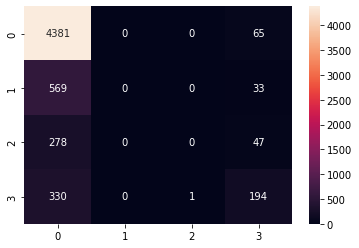

In [87]:
sns.heatmap(z, annot=True, fmt='d')

In [88]:
print(classification_report(np.argmax(np.array(test_labels1),axis=1),np.argmax(y_predictions,axis=1)))

              precision    recall  f1-score   support

           0       0.79      0.99      0.88      4446
           1       0.00      0.00      0.00       602
           2       0.00      0.00      0.00       325
           3       0.57      0.37      0.45       525

    accuracy                           0.78      5898
   macro avg       0.34      0.34      0.33      5898
weighted avg       0.65      0.78      0.70      5898



In [89]:
from sklearn.cluster import KMeans

In [90]:
def elbow_plot(mosquito, maxK=10, seed_centroids=None):
    """
        parameters:
        - mosquito: pandas mosquitoFrame (mosquito to be fitted)
        - maxK (default = 10): integer (maximum number of clusters with which to run k-means)
        - seed_centroids (default = None ): float (initial value of centroids for k-means)
    """
    sse = {}
    for k in range(1, maxK):
        print("k: ", k)
        if seed_centroids is not None:
            seeds = seed_centroids.head(k)
            kmeans = KMeans(n_clusters=k, max_iter=500, n_init=100, random_state=0, init=np.reshape(seeds, (k,1))).fit(mosquito)
            mosquito["clusters"] = kmeans.labels_
        else:
            kmeans = KMeans(n_clusters=k, max_iter=300, n_init=100, random_state=0).fit(mosquito)
            mosquito["clusters"] = kmeans.labels_
        # Inertia: Sum of distances of samples to their closest cluster center
        sse[k] = kmeans.inertia_
    plt.figure()
    plt.plot(list(sse.keys()), list(sse.values()))
    plt.show()
    return

k:  1
k:  2
k:  3
k:  4
k:  5
k:  6
k:  7
k:  8
k:  9


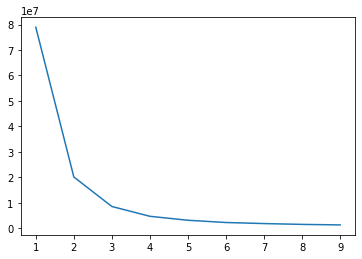

In [91]:
df = train_features.append(test_features)
elbow_plot(df,maxK=10)

In [92]:
KMeans(n_clusters=4, ).fit(train_features.append(test_features))

KMeans(n_clusters=4)